[*********************100%***********************]  1 of 1 completed


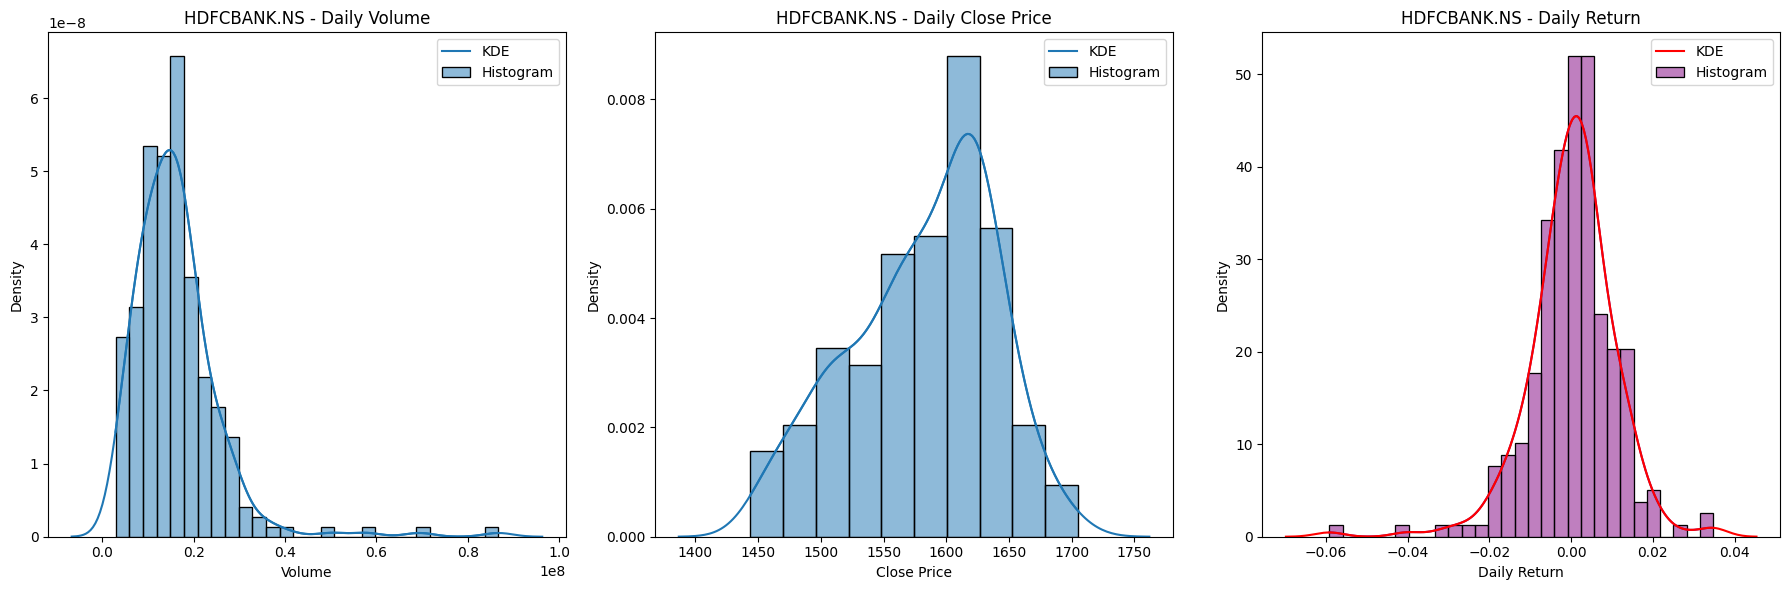

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm


stock_ticker = 'HDFCBANK.NS'
start_date = '2023-01-01'
end_date = '2023-12-31'

data = yf.download(stock_ticker, start=start_date, end=end_date)

data['Daily Return'] = data['Adj Close'].pct_change()

clean_data = data.dropna()

def calculate_statistics(series, confidence=0.95):
    """
    Calculate the mean, standard deviation, t-score, z-score, and confidence interval for a given data series.
    Operates on a pd.Series and returns scalar values.
    """
    series = series.squeeze()

    n = len(series)
    mean = series.mean()
    std_dev = series.std()

    z_critical = norm.ppf((1 + confidence) / 2)

    t_critical = t.ppf((1 + confidence) / 2, df=n - 1)

    margin_of_error_z = z_critical * (std_dev / np.sqrt(n))
    margin_of_error_t = t_critical * (std_dev / np.sqrt(n))


    ci_z = (mean - margin_of_error_z, mean + margin_of_error_z)
    ci_t = (mean - margin_of_error_t, mean + margin_of_error_t)

    return {
        'mean': mean,
        'std_dev': std_dev,
        'z_critical': z_critical,
        't_critical': t_critical,
        'margin_of_error_z': margin_of_error_z,
        'margin_of_error_t': margin_of_error_t,
        'ci_z': ci_z,
        'ci_t': ci_t
    }


volume_stats = calculate_statistics(clean_data['Volume'])
close_stats = calculate_statistics(clean_data['Adj Close'])
return_stats = calculate_statistics(clean_data['Daily Return'])


stats_df = pd.DataFrame({
    'Metric': ['Volume', 'Close Price', 'Daily Return'],
    'Mean': [volume_stats['mean'], close_stats['mean'], return_stats['mean']],
    'Standard Deviation': [volume_stats['std_dev'], close_stats['std_dev'], return_stats['std_dev']],
    '95% CI (Z)': [f"({volume_stats['ci_z'][0]:.2f}, {volume_stats['ci_z'][1]:.2f})",
                   f"({close_stats['ci_z'][0]:.2f}, {close_stats['ci_z'][1]:.2f})",
                   f"({return_stats['ci_z'][0]:.4f}, {return_stats['ci_z'][1]:.4f})"],
    '95% CI (T)': [f"({volume_stats['ci_t'][0]:.2f}, {volume_stats['ci_t'][1]:.2f})",
                   f"({close_stats['ci_t'][0]:.2f}, {close_stats['ci_t'][1]:.2f})",
                   f"({return_stats['ci_t'][0]:.4f}, {return_stats['ci_t'][1]:.4f})"]
})





plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
sns.histplot(clean_data['Volume'], kde=True, color='blue', stat="density", label="Histogram")
sns.kdeplot(clean_data['Volume'], color='red', label="KDE")
plt.title(f'{stock_ticker} - Daily Volume')
plt.xlabel('Volume')
plt.ylabel('Density')
plt.legend()


plt.subplot(1, 3, 2)
sns.histplot(clean_data['Adj Close'], kde=True, color='red', stat="density", label="Histogram")
sns.kdeplot(clean_data['Adj Close'], color='red', label="KDE")
plt.title(f'{stock_ticker} - Daily Close Price')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend()


plt.subplot(1, 3, 3)
sns.histplot(clean_data['Daily Return'], kde=True, color='purple', stat="density", label="Histogram")
sns.kdeplot(clean_data['Daily Return'], color='red', label="KDE")
plt.title(f'{stock_ticker} - Daily Return')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
print("\nStatistical Summary DataFrame:")
stats_df


Statistical Summary DataFrame:


,Metric,Mean,Standard Deviation,95% CI (Z),95% CI (T)
0,Volume,1.610846e+07,9.606464e+06,"(14903103.50, 17313823.23)","(14897070.18, 17319856.54)"
1,Close Price,1.581463e+03,5.698219e+01,"(1574.31, 1588.61)","(1574.28, 1588.65)"
2,Daily Return,3.011054e-04,1.061984e-02,"(-0.0010, 0.0016)","(-0.0010, 0.0016)"
